In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [61]:
## main functions

def data_preprocessing(df):

    columns_to_drop=['postalcode', 'addressline2', 'phone', 
                     'productcode', 'msrp', 'contactfirstname', 
                     'contactlastname', 'qtr_id', 'orderlinenumber']
    df.columns= df.columns.str.lower()
    df.sort_values(by=['ordernumber'])
    df['orderdate'] = pd.to_datetime(df['orderdate'])
    df.drop(columns_to_drop, axis=1,inplace= True)
    df['territory'] = df['territory'].fillna('NAM') ## imputing teritory "nam"
    df = df[~((df['status'] == 'Cancelled') | (df['status'] == 'On Hold'))] ## remove the canceled and pending cols
    
    return df


def categorize_columns(df):
    numeric_fields = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    object_fields = df.select_dtypes(include='object').columns.tolist()
    date_fields = df.select_dtypes(include="datetime64").columns.tolist()

    print("Numeric Fields:", numeric_fields)
    print("Object Fields:", object_fields)
    print("Date Fields:", date_fields)

    
    return numeric_fields, object_fields, date_fields

def graph_save(plot):
    jpg_file_path = f'/Users/shankuriakose/Downloads/{plot}.jpg'
    # Save the plot as a JPG file
    plt.savefig(jpg_file_path, format='jpg')



def missing_cols_percent():
    ## cols with missing values
    missing_percentages = (sales.isnull().mean() * 100).round(2)
    
    missing_columns = missing_percentages[missing_percentages > 0].index.tolist()
    
    print("Columns with missing values:")
    for column in missing_columns:
        print(f"{column}: {missing_percentages[column]}%")

In [62]:
df = pd.read_csv("datasets_435_896_sales_data_sample.csv", encoding='latin-1')
sales1 = data_preprocessing(df)
numeric_fields, object_fields, date_fields = categorize_columns(sales1)
sales1.head()

Numeric Fields: ['ordernumber', 'quantityordered', 'priceeach', 'sales', 'month_id', 'year_id']
Object Fields: ['status', 'productline', 'customername', 'addressline1', 'city', 'state', 'country', 'territory', 'dealsize']
Date Fields: ['orderdate']


ordernumber  quantityordered  priceeach    sales  orderdate   status  \
0        10107               30      95.70  2871.00 2003-02-24  Shipped   
1        10121               34      81.35  2765.90 2003-05-07  Shipped   
2        10134               41      94.74  3884.34 2003-07-01  Shipped   
3        10145               45      83.26  3746.70 2003-08-25  Shipped   
4        10159               49     100.00  5205.27 2003-10-10  Shipped   

   month_id  year_id  productline              customername  \
0         2     2003  Motorcycles         Land of Toys Inc.   
1         5     2003  Motorcycles        Reims Collectables   
2         7     2003  Motorcycles           Lyon Souveniers   
3         8     2003  Motorcycles         Toys4GrownUps.com   
4        10     2003  Motorcycles  Corporate Gift Ideas Co.   

                    addressline1           city state country territory  \
0        897 Long Airport Avenue            NYC    NY     USA       NAM   
1             59 rue de l'Abbaye          Reims   NaN  France      EMEA   
2  27 rue du Colonel Pierre Avia          Paris   NaN  France      EMEA   
3             78934 Hillside Dr.       Pasadena    CA     USA       NAM   
4                7734 Strong St.  San Francisco    CA     USA       NAM   

  dealsize  
0    Small  
1    Small  
2   Medium  
3   Medium  
4   Medium

In [63]:
sales1[numeric_fields].describe()


ordernumber  quantityordered    priceeach         sales     month_id  \
count   2719.000000      2719.000000  2719.000000   2719.000000  2719.000000   
mean   10257.082383        34.994483    83.608823   3552.468621     7.127620   
std       91.804223         9.490534    20.278691   1839.065712     3.695288   
min    10100.000000         6.000000    26.880000    482.130000     1.000000   
25%    10178.000000        27.000000    68.505000   2202.050000     4.000000   
50%    10263.000000        35.000000    95.930000   3184.020000     8.000000   
75%    10332.000000        43.000000   100.000000   4509.100000    11.000000   
max    10425.000000        97.000000   100.000000  12536.500000    12.000000   

           year_id  
count  2719.000000  
mean   2003.799926  
std       0.695608  
min    2003.000000  
25%    2003.000000  
50%    2004.000000  
75%    2004.000000  
max    2005.000000

In [64]:
sales1[object_fields].describe()

status   productline           customername        addressline1  \
count      2719          2719                   2719                2719   
unique        4             7                     92                  92   
top     Shipped  Classic Cars  Euro Shopping Channel  C/ Moralzarzal, 86   
freq       2617           939                    243                 243   

          city state country territory dealsize  
count     2719  1285    2719      2719     2719  
unique      73    16      19         4        3  
top     Madrid    CA     USA      EMEA   Medium  
freq       288   404     952      1355     1327

In [65]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2719 entries, 0 to 2821
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      2719 non-null   int64         
 1   quantityordered  2719 non-null   int64         
 2   priceeach        2719 non-null   float64       
 3   sales            2719 non-null   float64       
 4   orderdate        2719 non-null   datetime64[ns]
 5   status           2719 non-null   object        
 6   month_id         2719 non-null   int64         
 7   year_id          2719 non-null   int64         
 8   productline      2719 non-null   object        
 9   customername     2719 non-null   object        
 10  addressline1     2719 non-null   object        
 11  city             2719 non-null   object        
 12  state            1285 non-null   object        
 13  country          2719 non-null   object        
 14  territory        2719 non-null   object      

/var/folders/b0/n1lts3d9719flnb_t36n93qw0000gn/T/ipykernel_87303/565892431.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




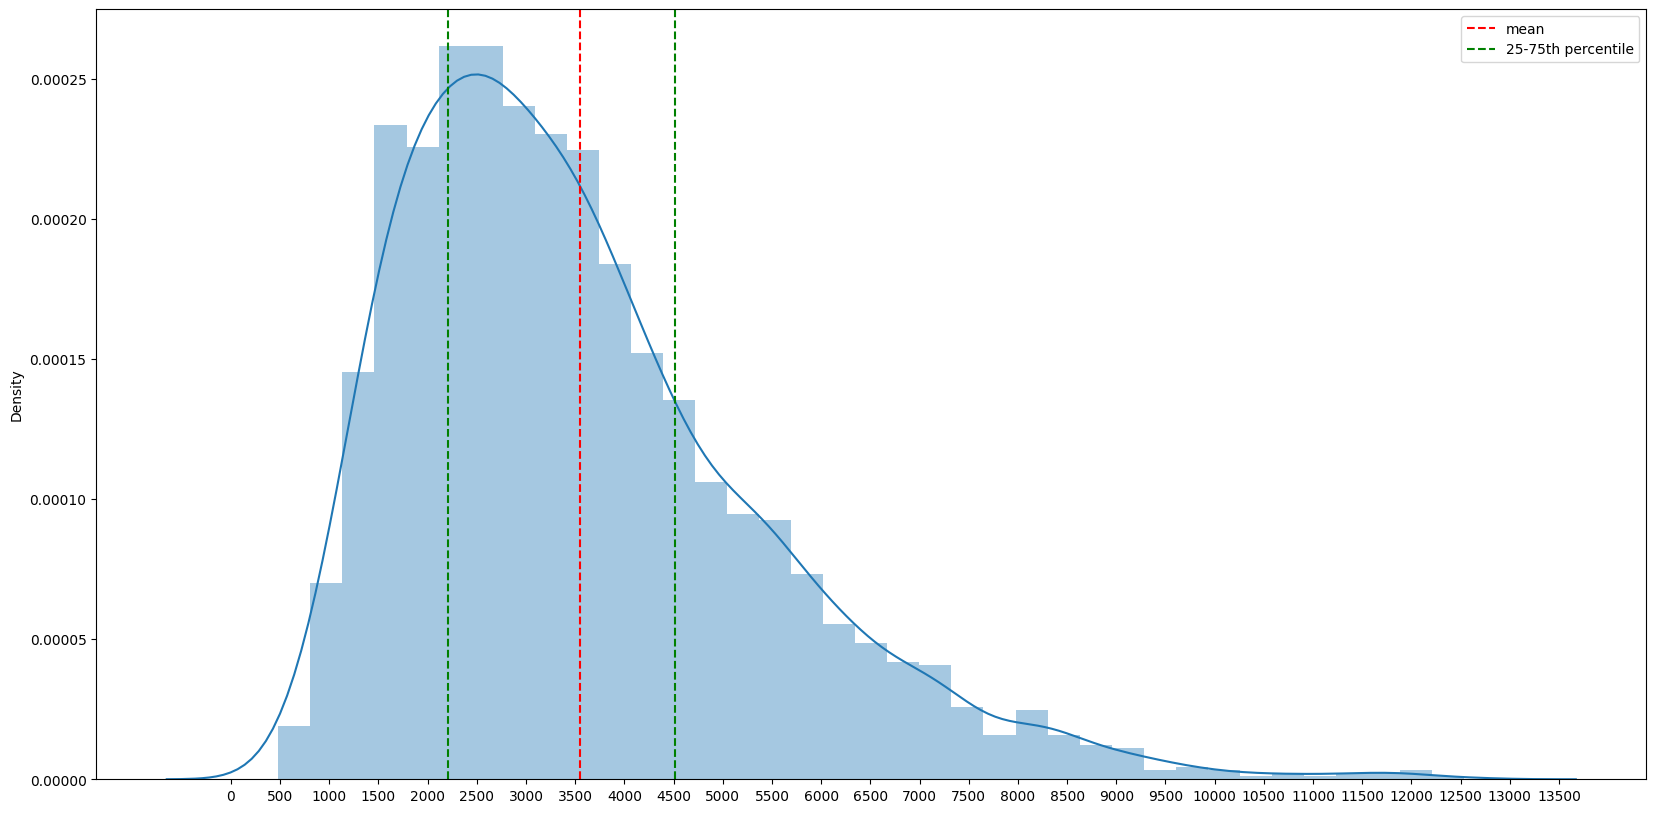

In [67]:
# Sales Distribution

plt.figure(figsize=(20,10))
sns.distplot(x = sales1['sales'])
plt.axvline(x = np.mean(sales1['sales']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(sales1['sales'], 25), c = 'green', ls = '--', label = '25-75th percentile')
plt.axvline(x = np.percentile(sales1['sales'], 75), c = 'green', ls = '--')
plt.xticks(np.arange(0,14000,500))
plt.legend()
graph_save("sales_distribution")

plt.show()

* Sales distribution is right skewed. Most of the sales are between 2000-2500. Mean sale is around 3500.


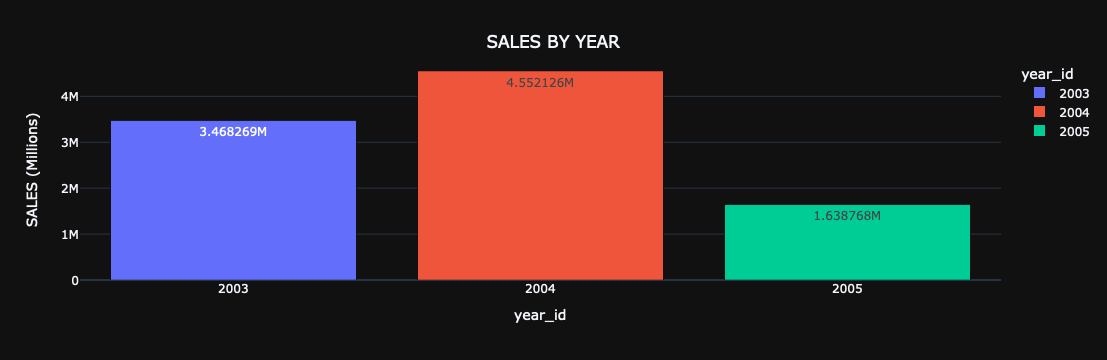

In [8]:
# Annual Revenue


y = sales1.groupby(['year_id'])['sales'].sum().reset_index()
y['year_id'] = y['year_id'].astype('str')
y1 = px.bar(y,x = 'year_id', y = 'sales',color = 'year_id',text_auto = True,
            template="plotly_dark")
y1 = y1.update_layout(title={'text' : 'SALES BY YEAR',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
y1 = y1.update_layout(xaxis_title='year_id', yaxis_title='SALES (Millions)')
y1.show()
y['year_id'] = y['year_id'].astype('int')


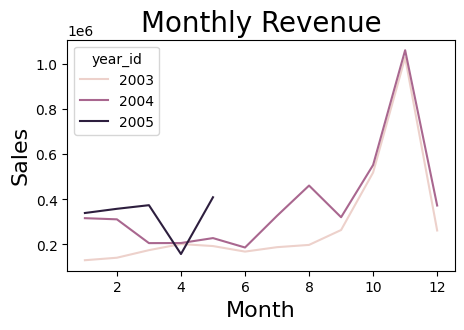

In [68]:
# Monthly Revenue
plt.figure(figsize=(5,3))

monthly_revenue = sales1.groupby(['year_id','month_id'])['sales'].sum().reset_index()

sns.lineplot(x="month_id", y="sales",hue="year_id", data=monthly_revenue)
plt.title('Monthly Revenue', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
graph_save("MonthlyRevenue")

plt.show()

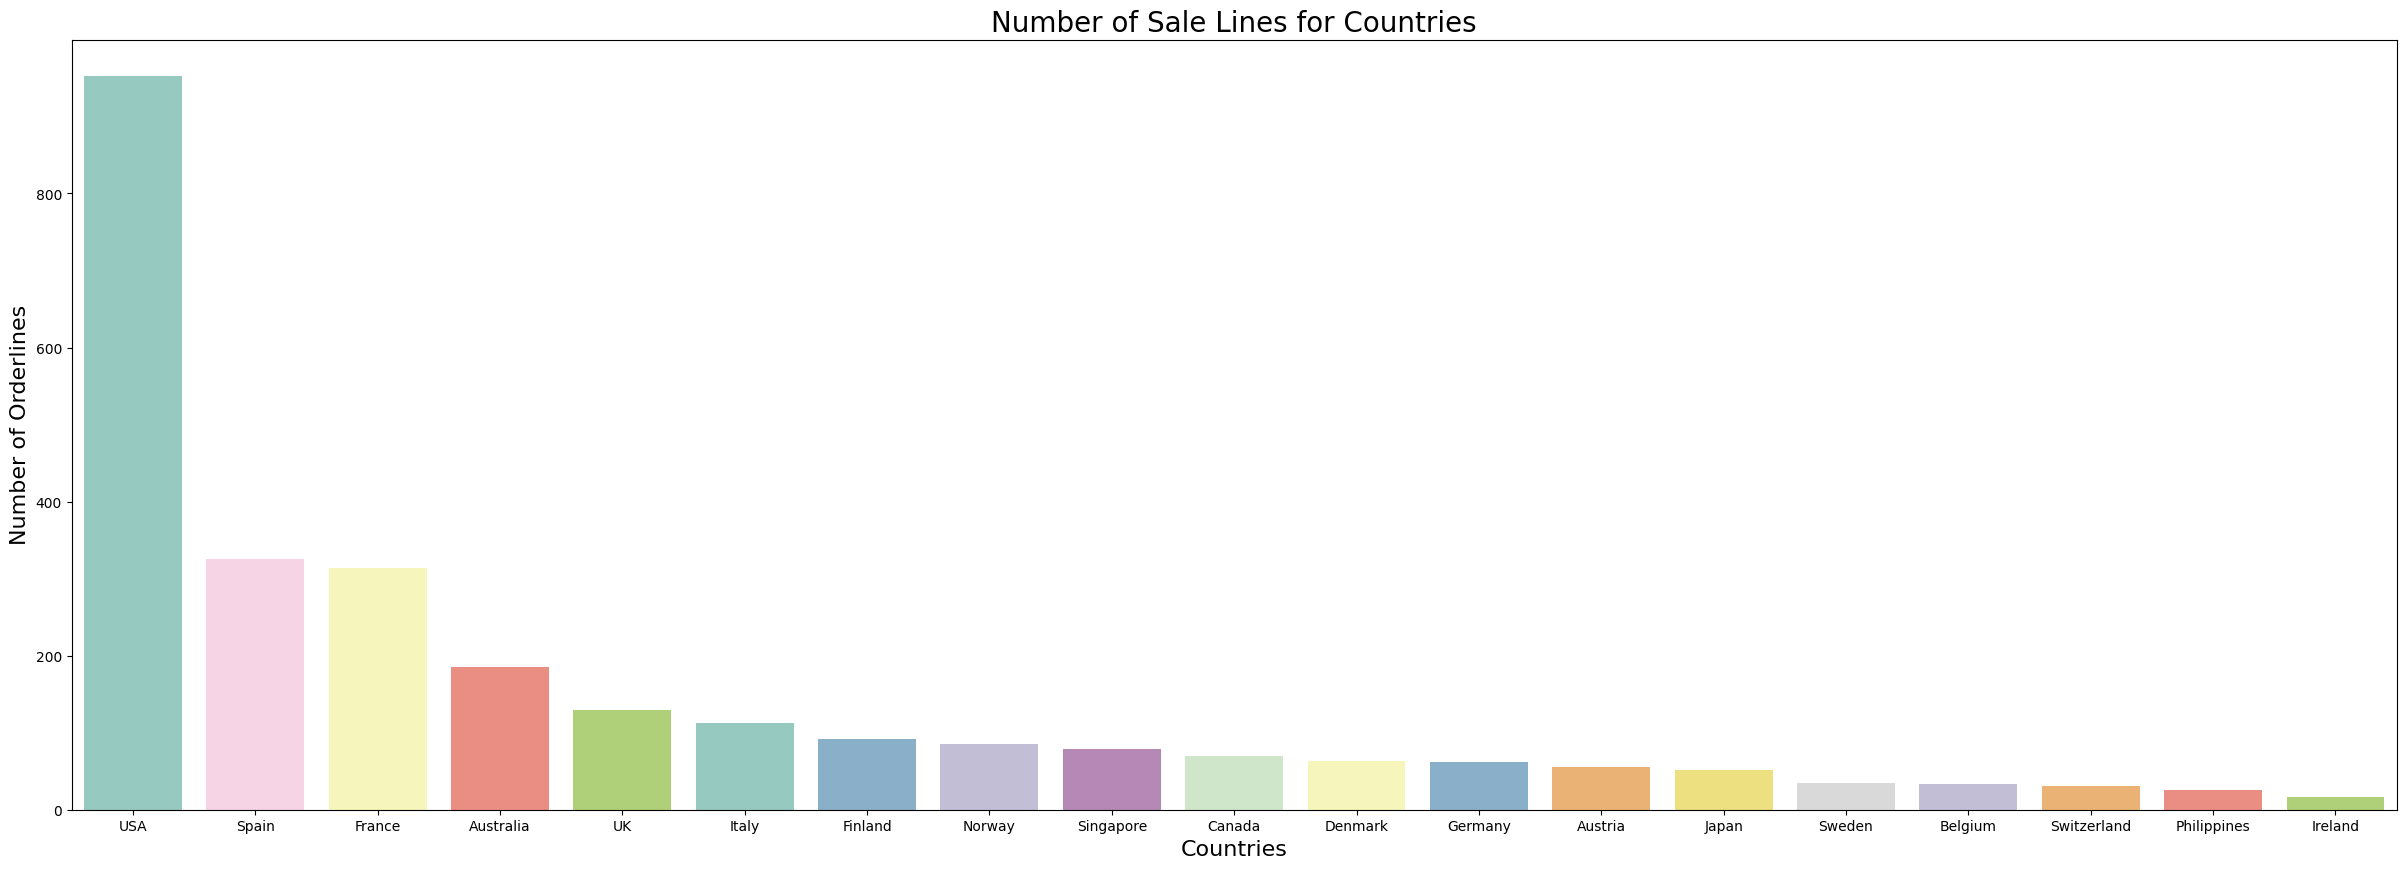

In [69]:

plt.figure(figsize=(30, 10))

# Create a custom color palette (you can customize this as needed)
colors = sns.color_palette("Set3", len(sales1['country'].unique()))

sns.countplot(x=sales1['country'], order=sales1['country'].value_counts().index, hue=sales1['country'], palette=colors, legend=False)

plt.title('Number of Sale Lines for Countries', fontsize=20)
plt.ylabel('Number of Orderlines', fontsize=16)
plt.xlabel('Countries', fontsize=16)
graph_save("sales_per_countires")
plt.show()


/var/folders/b0/n1lts3d9719flnb_t36n93qw0000gn/T/ipykernel_87303/390462728.py:11: UserWarning:

The palette list has more values (19) than needed (18), which may not be intended.



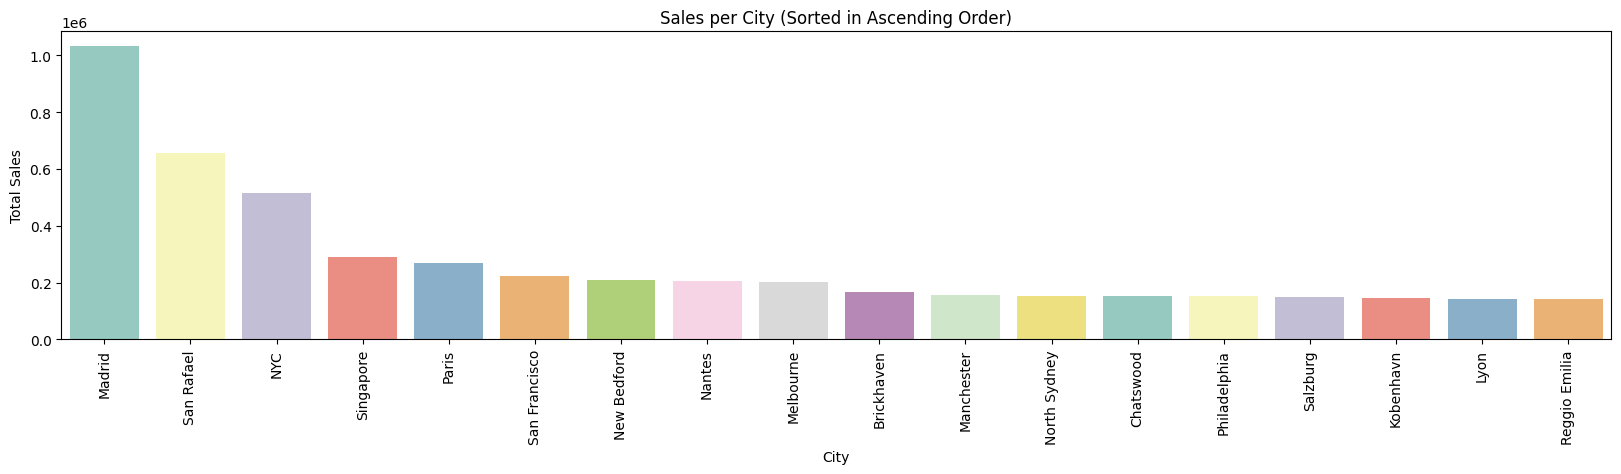

In [70]:
plt.figure(figsize=(20, 4))

olors = sns.color_palette("Set2", n_colors=len(sales1["city"].unique()))

cities = sales1.groupby(['city'])['sales'].sum().reset_index()

# Sort the DataFrame by total sales in ascending order
cities_sorted = cities.sort_values(by='sales', ascending=False)[:18]

# Use 'city' as the hue variable and set legend=False
sns.barplot(x='city', y='sales', data=cities_sorted, palette=colors, hue='city', legend=False)

plt.title('Sales per City (Sorted in Ascending Order)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
graph_save("Sales_per_city")
plt.show()

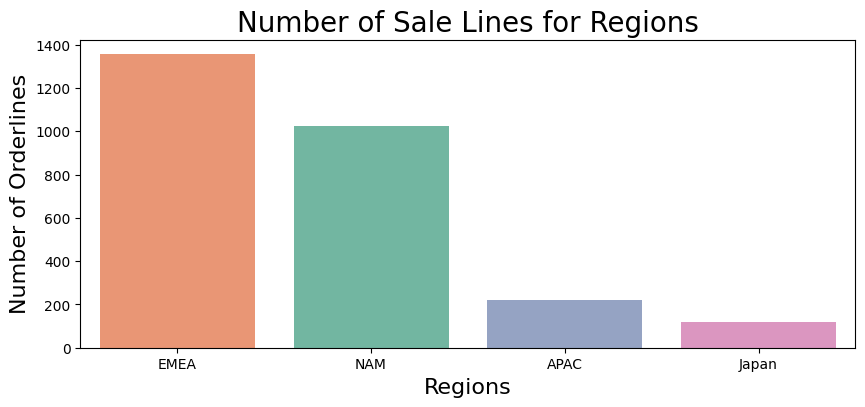

In [71]:
# Number of Sale Lines for Regions
plt.figure(figsize=(10, 4))

# Create a custom color palette (you can customize this as needed)
colors = sns.color_palette("Set2", len(sales1['territory'].unique()))

sns.countplot(x=sales1['territory'], order=sales1['territory'].value_counts().index, hue=sales1['territory'], palette=colors, legend=False)

plt.title('Number of Sale Lines for Regions', fontsize=20)
plt.ylabel('Number of Orderlines', fontsize=16)
plt.xlabel('Regions', fontsize=16)
graph_save("sales_per_regions")
plt.show()

* The most of sales are happened at USA. Spain and France are the second and third most sold countries

* The most of sales are happened at EMEA region. The NAM region which USA is in it is the second most sold region
* City of Madrid had the best sales in the world followed by San Rafael and New York City.

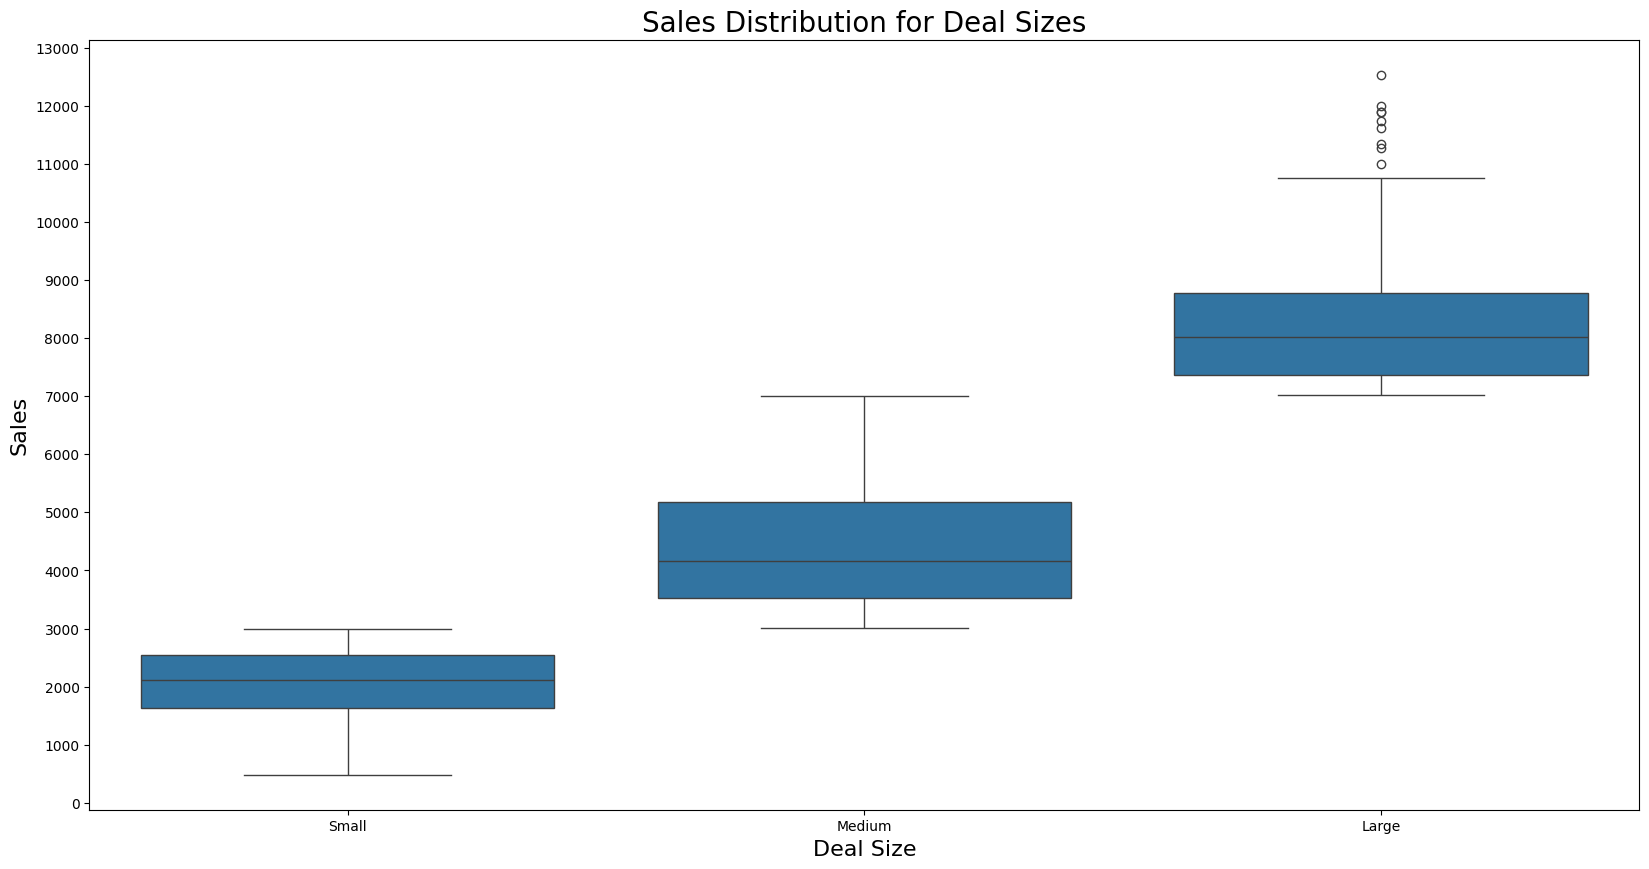

In [13]:
 #Sales Distribution for Dealsizes
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,14000,1000))
sns.boxplot(x = sales1['dealsize'], y = sales1['sales'])
plt.title('Sales Distribution for Deal Sizes', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Deal Size', fontsize = 16)
plt.show()

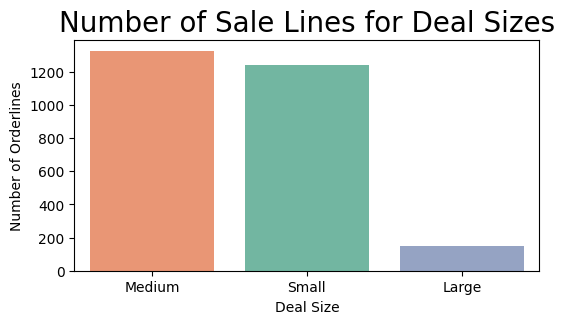

In [72]:
# Number of Sale Lines for Deal Size
plt.figure(figsize=(6,3))

# Create a custom color palette with the same number of unique values in 'dealsize'
colors = sns.color_palette("Set2", len(sales1['dealsize'].unique()))

sns.countplot(x=sales1['dealsize'], order=sales1['dealsize'].value_counts().index, hue=sales1['dealsize'], palette=colors, legend=False)

plt.title('Number of Sale Lines for Deal Sizes', fontsize=20)
plt.ylabel('Number of Orderlines')
plt.xlabel('Deal Size')
graph_save("sales_per_deal_size")
plt.show()

* Small sales are sales between 0 and 3000. Medium sales are sales between 3000 and 7000. Large sales are the sales higher than 7000.

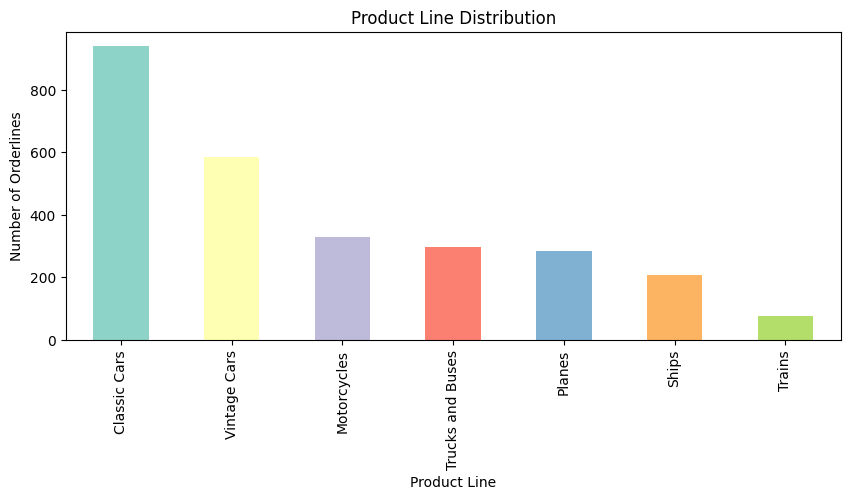

In [73]:
plt.figure(figsize=(10,4))
colors = plt.cm.Set3(range(len(sales1['productline'].unique())))

sales1['productline'].value_counts().plot(kind='bar', color=colors)
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Number of Orderlines')
graph_save("product_line")
plt.show()

* The most of the sales are belong Classic Cars category. Vintage Cars and Motorcycles are the second and third ones. The least of sales are happened in Trains category.

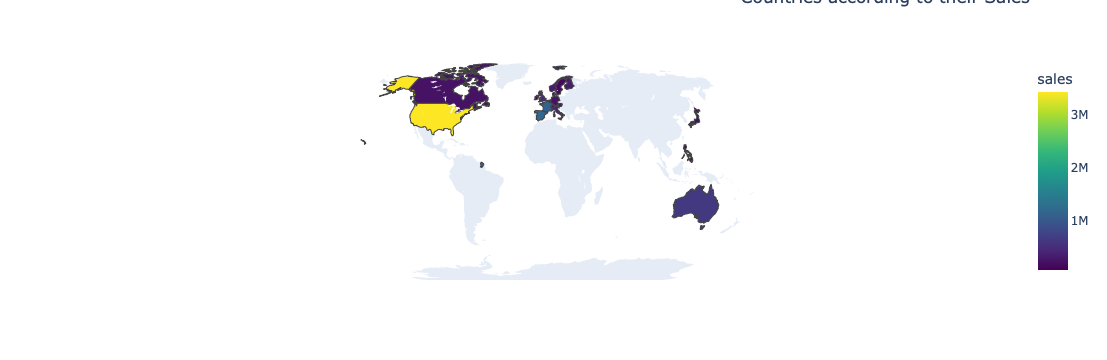

In [16]:

# Assuming 'sales1' is your DataFrame
country = sales1.groupby(['country'])['sales'].sum().reset_index()
short_form = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'IRL', 'ITA', 'JPN', 'NOR', 'PHL', 'SGP', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']
country['iso_alpha'] = short_form

# Choropleth map using Plotly
fig = px.choropleth(country, locations='iso_alpha', color="sales",
                    scope="world", hover_name="country",
                    color_continuous_scale='Viridis',  # You can change the color scale
                    projection="natural earth")  # You can change the projection

# Updating the Map by adding the title and modifying layout
fig.update_layout(
    title=dict(
        text="Countries according to their Sales",
        xanchor='center',
        x=.8,
        yref='paper',
        yanchor='bottom',
        y=.99,
        pad={'b': 60}
    ),
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines
    )
)

fig.show()


/var/folders/b0/n1lts3d9719flnb_t36n93qw0000gn/T/ipykernel_87303/1806738350.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



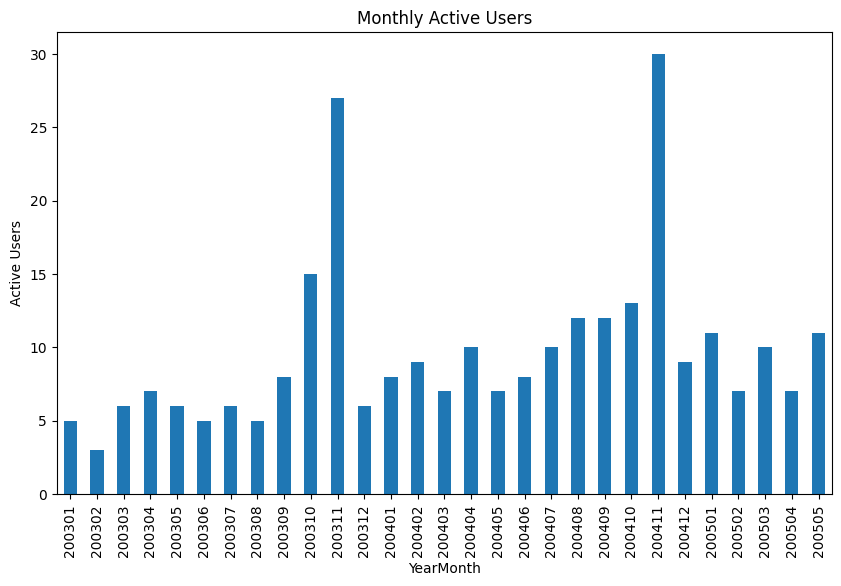

In [17]:
# Monthly Active Users
sales1['year_month'] = sales1['year_id'].map(str)+sales1['month_id'].map(str).map(lambda x: x.rjust(2,'0'))

plt.figure(figsize=(10,6))
sales1.groupby(['year_month'])['customername'].nunique().plot(kind='bar')
plt.title('Monthly Active Users')
plt.xlabel('YearMonth')
plt.ylabel('Active Users')
plt.show()

# The monthly active users show similar trend to sales. The active users are peaked at most sold months.

## 1 . Sales Analysis 



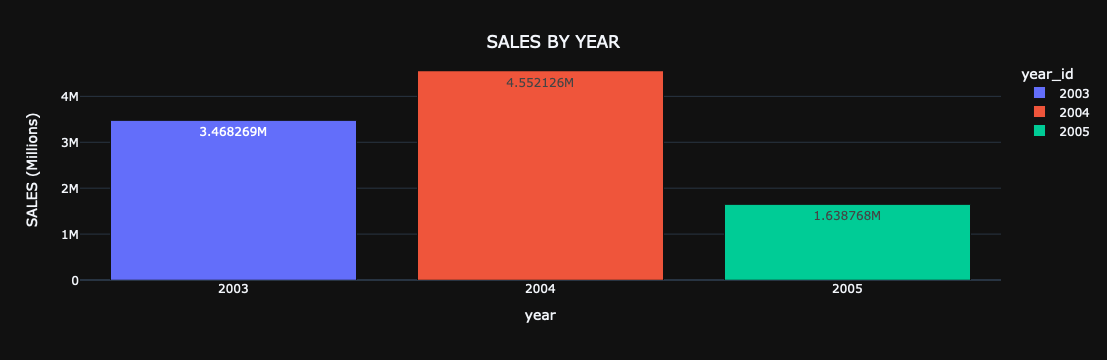

In [18]:
y = sales1.groupby(['year_id'])['sales'].sum().reset_index()
y['year_id'] = y['year_id'].astype('str')
y1 = px.bar(y,x = 'year_id', y = 'sales',color = 'year_id',text_auto = True,
            template="plotly_dark")
y1 = y1.update_layout(title={'text' : 'SALES BY YEAR',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
y1 = y1.update_layout(xaxis_title='year', yaxis_title='SALES (Millions)')
y1.show()
y['year_id'] = y['year_id'].astype('int')


Percentage Increase=((New Value−Original Value)/Orginal Value)×100

* Where:
    - New Value is the updated or increased value.
    - Original Value is the initial or base value.



In [19]:
y

year_id       sales
0     2003  3468268.62
1     2004  4552125.83
2     2005  1638767.73

In [20]:
def calculate_percentage_increase(df):
    df['percentage_increase'] = df['sales'].pct_change() * 100
    return df.dropna()

result_df = calculate_percentage_increase(y)

# Display the result
result_df


year_id       sales  percentage_increase
1     2004  4552125.83            31.250671
2     2005  1638767.73           -63.999947

* There is 31% increase in 2003 to 2004,
* In 2004-05 the we do not have the full sales data

In [21]:
sales1['M'] = sales1['orderdate'].dt.month_name()
ym = sales1.groupby(['month_id','year_id','M'])['sales'].sum().reset_index()
ym["year/month"] = ym['year_id'].astype('str') + '-' +  ym['M']
ym['sort'] = ym['year_id'].astype('str') + '-' + ym['month_id'].astype('str')
ym['sort'] = pd.to_datetime(ym['sort'])
ym = ym.sort_values(by = 'sort')
ym.head()

/var/folders/b0/n1lts3d9719flnb_t36n93qw0000gn/T/ipykernel_87303/2947518710.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month_id  year_id         M      sales     year/month       sort
0          1     2003   January  129753.60   2003-January 2003-01-01
3          2     2003  February  140836.19  2003-February 2003-02-01
6          3     2003     March  174504.90     2003-March 2003-03-01
9          4     2003     April  201609.55     2003-April 2003-04-01
12         5     2003       May  192673.11       2003-May 2003-05-01

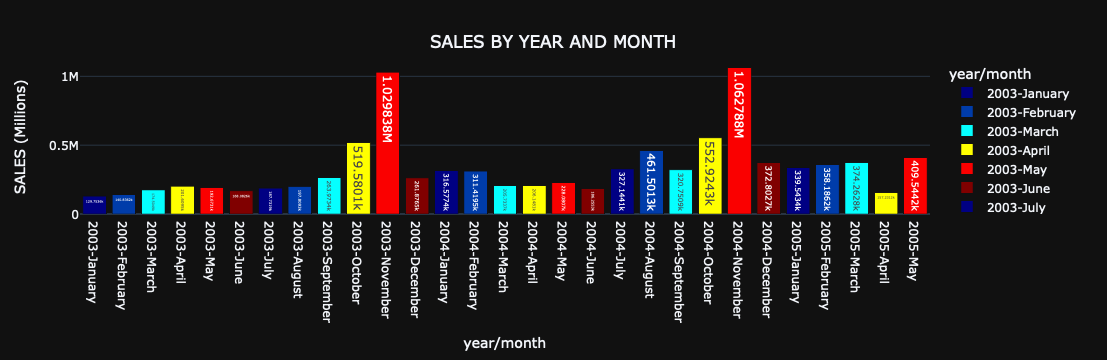

In [22]:
ym = px.bar(ym,x = 'year/month', y = 'sales',color = 'year/month',text_auto = True,
            template="plotly_dark",color_discrete_sequence=px.colors.sequential.Jet )
ym = ym.update_layout(title={'text' : 'SALES BY YEAR AND MONTH',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
ym = ym.update_layout(xaxis_title='year/month', yaxis_title='SALES (Millions)')
ym.show()

#### we see that in both 2003 and 2004 november was the best 

In [23]:
yy = sales1.groupby(['year_id'])['sales'].sum().reset_index()
yy
nov_m = sales1.query('month_id == 11 and (year_id in (2003, 2004))').groupby(['year_id'])['sales'].sum().reset_index()

percent = yy.merge(nov_m, on = 'year_id')
percent['Percent'] = round(percent['sales_y'] / percent['sales_x'] * 100,2)
percent[['year_id','Percent']]


year_id  Percent
0     2003    29.69
1     2004    23.35

## Nov 2003 has almost 30% of its sales in 2003

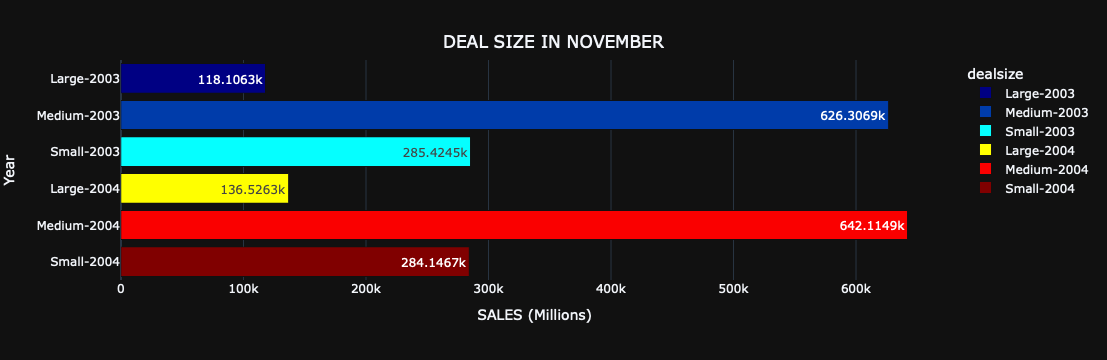

In [24]:
nov = sales1.query('month_id == 11 and (year_id in (2003, 2004))').groupby(['year_id', 'dealsize'])['sales'].sum().reset_index()
nov['dealsize'] = nov['dealsize'] + '-' + nov['year_id'].astype('str')


nov = px.bar(nov,x = 'sales', y = 'dealsize',color = 'dealsize',text_auto = True,
            template="plotly_dark",color_discrete_sequence=px.colors.sequential.Jet
            ,orientation='h')
nov = nov.update_layout(title={'text' : 'DEAL SIZE IN NOVEMBER',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
nov = nov.update_layout(xaxis_title='SALES (Millions)', yaxis_title='Year')
nov.show()


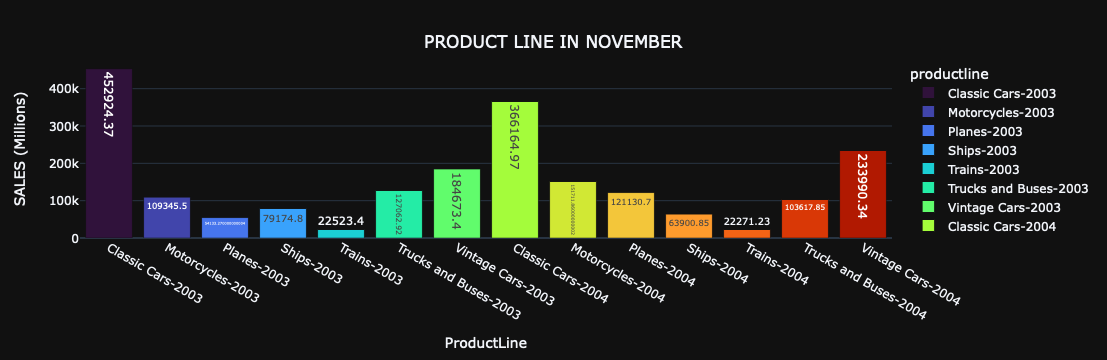

In [25]:
prd = sales1.query('month_id == 11 and (year_id in (2003, 2004))').groupby(['year_id', 'productline'])['sales'].sum().reset_index()
prd['productline'] = prd['productline'] + '-' + prd['year_id'].astype('str')
prd_chart = px.bar(prd, x='productline', y='sales', color='productline', text='sales',
                   template="plotly_dark", color_discrete_sequence=px.colors.sequential.Turbo)

prd_chart.update_layout(
    title={'text': 'PRODUCT LINE IN NOVEMBER', 'y': 0.9, 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='ProductLine', yaxis_title='SALES (Millions)'
)

prd_chart.show()


## Classic cars were the best-selling product in November 2003 and November 2004¶


In [26]:
cou = sales1.groupby(['year_id','country'])['sales'].sum().reset_index()


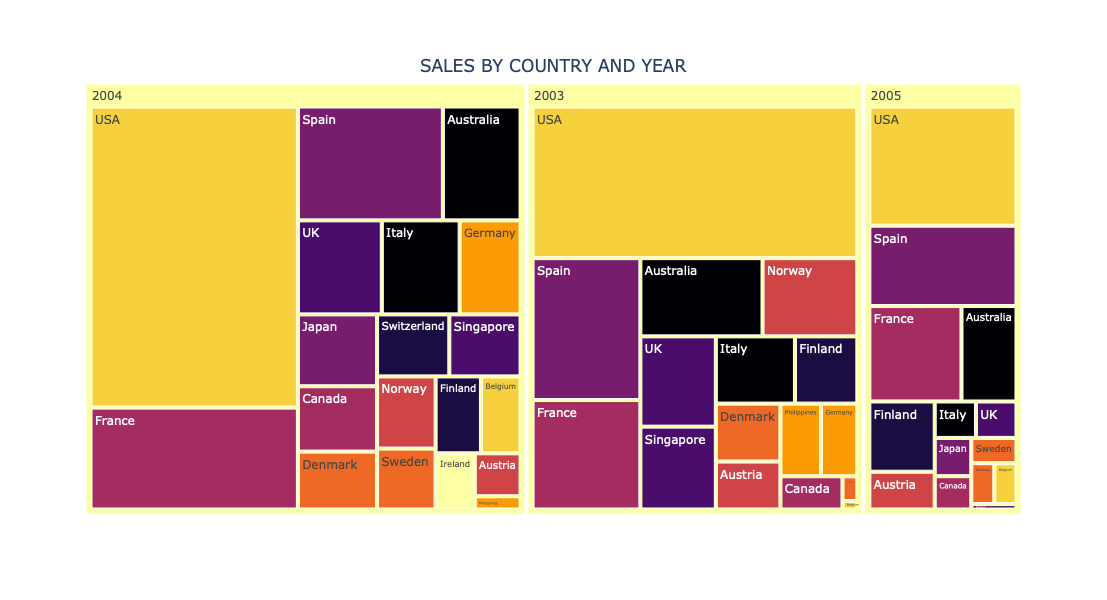

In [27]:
cou1 = px.treemap(cou, path=['year_id', 'country'], values='sales', color='country',
                 height=600, width=800, template="plotly",
                 color_discrete_sequence=px.colors.sequential.Inferno)

cou1 = cou1.update_layout(title={'text': 'SALES BY COUNTRY AND YEAR', 'y': 0.9, 'x': 0.5, 'xanchor': 'center'})
cou1.show()


In [28]:
tsa_data = sales1[["orderdate","sales","city","state","country","dealsize","productline"]]
tsa_data = tsa_data.set_index("orderdate")
tsa_data

sales           city state  country dealsize  productline
orderdate                                                              
2003-02-24  2871.00            NYC    NY      USA    Small  Motorcycles
2003-05-07  2765.90          Reims   NaN   France    Small  Motorcycles
2003-07-01  3884.34          Paris   NaN   France   Medium  Motorcycles
2003-08-25  3746.70       Pasadena    CA      USA   Medium  Motorcycles
2003-10-10  5205.27  San Francisco    CA      USA   Medium  Motorcycles
...             ...            ...   ...      ...      ...          ...
2004-11-21  4080.72            NYC    NY      USA   Medium        Ships
2004-12-02  2244.40         Madrid   NaN    Spain    Small        Ships
2005-01-31  3978.51           Oulu   NaN  Finland   Medium        Ships
2005-03-01  5417.57         Madrid   NaN    Spain   Medium        Ships
2005-03-28  2116.16       Toulouse   NaN   France    Small        Ships

[2719 rows x 6 columns]

In [29]:
cou0304 = cou.merge(y, on = 'year_id').query('country == "USA" and year_id in (2003,2004)')
cou0304['Percent'] = round(cou0304['sales_x'] / cou0304['sales_y'] * 100,2) 
cou0304.drop(columns=['sales_x','sales_y'])

year_id country  percentage_increase  Percent
15     2003     USA                  NaN    37.63
34     2004     USA            31.250671    36.03

### in 2003 and 2004 1/3 of the total sales belonged to the USA

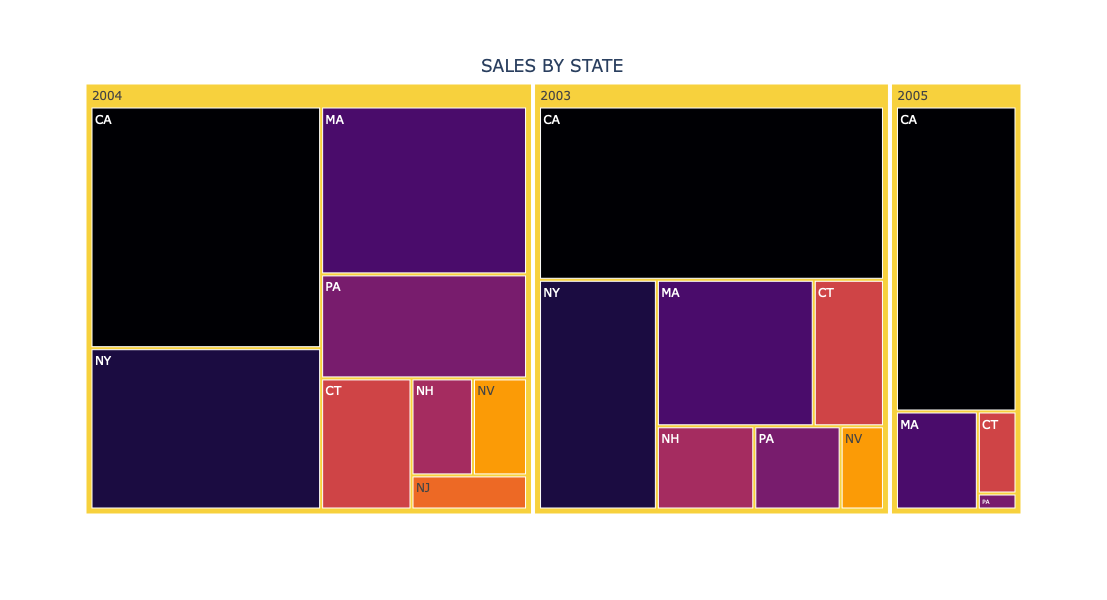

In [30]:
st = sales1.query('country == "USA"').groupby(['year_id','state'])['sales'].sum().reset_index()
st1 = px.treemap(st,path=['year_id','state'],values='sales',color = 'state',
                 height = 600,width = 800,template="plotly",
                  color_discrete_sequence=px.colors.sequential.Inferno)
st1 = st1.update_layout(title={'text' : 'SALES BY STATE',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
st1.show()

In [31]:
city = sales1.groupby(['year_id','city'])['sales'].sum().reset_index()
city['Rank'] = city.groupby('year_id')['sales'].rank(method = 'dense',ascending = False).astype('int')  
city = city.query('Rank <= 5 ').sort_values(by = ['year_id','Rank'])
y03 = city.query('year_id == 2003 ')
y04 = city.query('year_id == 2004 ')
city


year_id           city      sales  Rank
27      2003         Madrid  305612.14     1
33      2003            NYC  215488.21     2
48      2003     San Rafael  185128.12     3
50      2003      Singapore  165686.20     4
47      2003  San Francisco  139806.34     5
88      2004         Madrid  400130.48     1
96      2004            NYC  299941.90     2
113     2004     San Rafael  256474.26     3
105     2004          Paris  170714.06     4
92      2004      Melbourne  140859.57     5
138     2005         Madrid  326798.17     1
153     2005     San Rafael  213255.68     2
142     2005         Nantes  103402.09     3
144     2005   North Sydney   65012.42     4
150     2005       Salzburg   59475.10     5

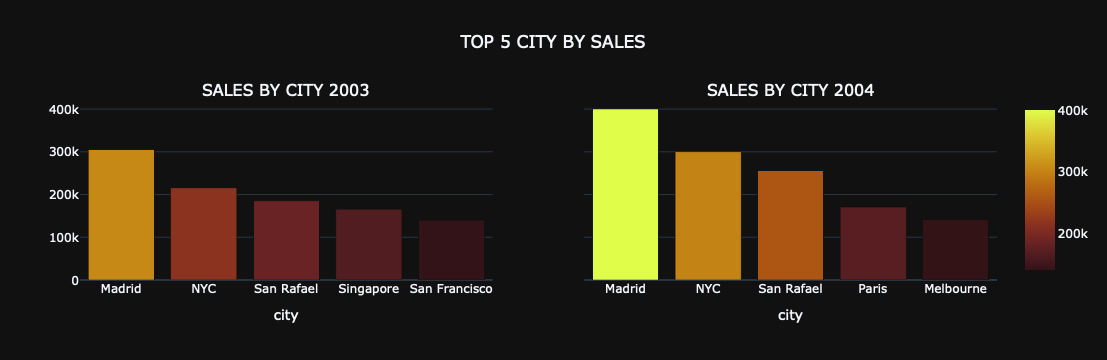

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=1, cols=2,shared_yaxes=True, subplot_titles=("SALES BY CITY 2003", "SALES BY CITY 2004")
)
fig.add_trace(go.Bar(x=y03['city'], y = y03['sales'],name='2003',
                     marker=dict(color=y03['sales'], coloraxis="coloraxis")), row=1, col=1)
fig.add_trace(go.Bar(x=y04['city'], y = y04['sales'],name='2004',
                     marker=dict(color=y04['sales'], coloraxis="coloraxis")), row=1, col=2)
fig.update_xaxes(title_text="city", row=1, col=1)
fig.update_xaxes(title_text="city", row=1, col=2)
fig = fig.update_layout(title={'text' : 'TOP 5 CITY BY SALES',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
fig = fig.update_layout(template = 'plotly_dark')
fig.update_layout(coloraxis=dict(colorscale='solar'), showlegend=False)
fig.show()

In [33]:
## growth statstics
tsa_data = sales1[["orderdate","sales","city","state","country","dealsize","productline"]]
tsa_data = tsa_data.set_index("orderdate")
tsa_data_sorted

NameError: name 'tsa_data_sorted' is not defined

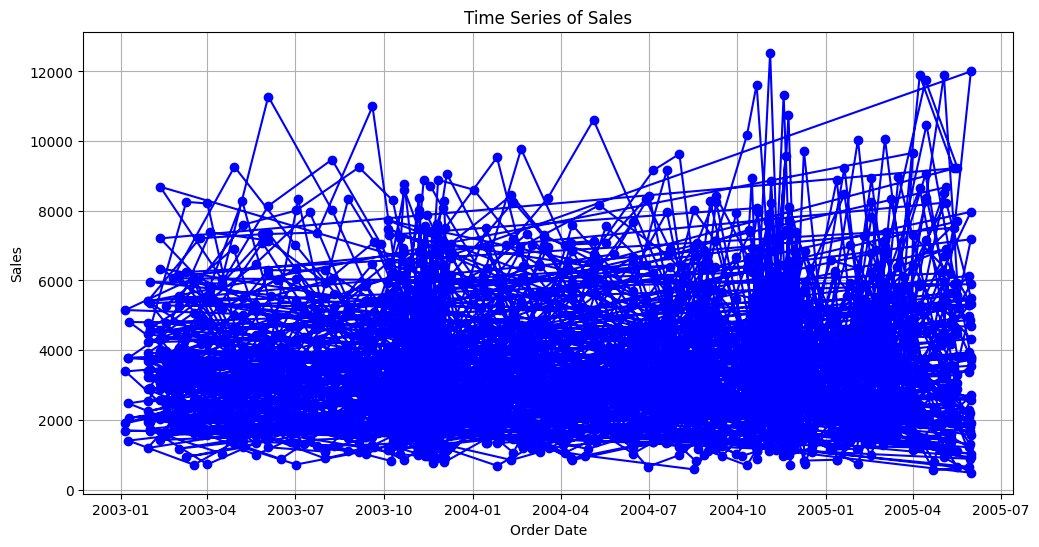

In [34]:
plt.figure(figsize=(12, 6))
# Plot the time series graph
plt.plot(tsa_data.index, tsa_data['sales'], marker='o', linestyle='-', color='b')

# Set plot title and labels
plt.title('Time Series of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')

# Show the plot
plt.grid(True)
plt.show()

In [35]:
tsa_data[monthly_sales] = tsa_data['sales'].resample('M').sum()


NameError: name 'monthly_sales' is not defined

In [36]:

# Group by country and city, then resample on a monthly basis and sum the sales
quarterly_sales_per_country = tsa_data.groupby(['country']).resample('Q')['sales'].sum().reset_index()

quarterly_sales_per_country


country  orderdate      sales
0    Australia 2003-06-30   60135.84
1    Australia 2003-09-30   86229.31
2    Australia 2003-12-31  106769.30
3    Australia 2004-03-31   49637.57
4    Australia 2004-06-30       0.00
..         ...        ...        ...
149        USA 2004-06-30  248539.87
150        USA 2004-09-30  407496.61
151        USA 2004-12-31  739301.85
152        USA 2005-03-31  402041.42
153        USA 2005-06-30   82603.86

[154 rows x 3 columns]

In [37]:
usa_sales_quarterly = quarterly_sales_per_country[quarterly_sales_per_country['country'] == 'USA'].reset_index()
usa_sales_quarterly['growth_rate_usa'] = usa_sales_quarterly['sales'].pct_change() * 100
usa_sales_quarterly.drop(["index","country","sales"],axis=1,inplace=True)

usa_sales_quarterly

orderdate  growth_rate_usa
0 2003-03-31              NaN
1 2003-06-30        49.810649
2 2003-09-30       121.443620
3 2003-12-31       105.643687
4 2004-03-31       -65.258049
5 2004-06-30         1.538219
6 2004-09-30        63.956234
7 2004-12-31        81.425276
8 2005-03-31       -45.618773
9 2005-06-30       -79.453893

In [38]:
france_sales_quarterly = quarterly_sales_per_country[quarterly_sales_per_country['country'] == 'France'].reset_index()
france_sales_quarterly['growth_rate_france'] = france_sales_quarterly['sales'].pct_change() * 100
france_sales_quarterly.drop(["index","country","sales"],axis=1,inplace=True)

france_sales_quarterly

orderdate  growth_rate_france
0 2003-06-30                 NaN
1 2003-09-30          -54.035027
2 2003-12-31          121.479801
3 2004-03-31           38.862836
4 2004-06-30          -59.266120
5 2004-09-30          -12.663287
6 2004-12-31          278.951737
7 2005-03-31          -37.888715
8 2005-06-30          -37.405310

In [39]:
spain_sales_quarterly = quarterly_sales_per_country[quarterly_sales_per_country['country'] == 'Spain'].reset_index()
spain_sales_quarterly['growth_rate_spain'] = spain_sales_quarterly['sales'].pct_change() * 100
spain_sales_quarterly.drop(["index","country","sales"],axis=1,inplace=True)

spain_sales_quarterly

orderdate  growth_rate_spain
0 2003-03-31                NaN
1 2003-06-30         135.104487
2 2003-09-30         -54.505171
3 2003-12-31         335.983416
4 2004-03-31         -49.303819
5 2004-06-30         -33.979993
6 2004-09-30         -68.431119
7 2004-12-31         975.269748
8 2005-03-31         -12.206045
9 2005-06-30         -42.548784

In [40]:
australia_sales_quarterly = quarterly_sales_per_country[quarterly_sales_per_country['country'] == 'Australia'].reset_index()
australia_sales_quarterly['growth_rate_australia'] = australia_sales_quarterly['sales'].pct_change() * 100
australia_sales_quarterly.drop(["index","country","sales"],axis=1,inplace=True)

australia_sales_quarterly

orderdate  growth_rate_australia
0 2003-06-30                    NaN
1 2003-09-30              43.390880
2 2003-12-31              23.820195
3 2004-03-31             -53.509511
4 2004-06-30            -100.000000
5 2004-09-30                    inf
6 2004-12-31             140.765301
7 2005-03-31             -32.824003
8 2005-06-30             -32.732451

In [41]:
italy_sales_quarterly = quarterly_sales_per_country[quarterly_sales_per_country['country'] == 'Italy'].reset_index()
italy_sales_quarterly['growth_rate_italy'] = italy_sales_quarterly['sales'].pct_change() * 100
italy_sales_quarterly.drop(["index","country","sales"],axis=1,inplace=True)

italy_sales_quarterly

orderdate  growth_rate_italy
0 2003-03-31                NaN
1 2003-06-30        -100.000000
2 2003-09-30                NaN
3 2003-12-31                inf
4 2004-03-31        -100.000000
5 2004-06-30                NaN
6 2004-09-30                inf
7 2004-12-31         -72.301719
8 2005-03-31        -100.000000
9 2005-06-30                inf

In [42]:
uk_sales_quarterly = quarterly_sales_per_country[quarterly_sales_per_country['country'] == 'UK'].reset_index()
uk_sales_quarterly['growth_rate_uk'] = uk_sales_quarterly['sales'].pct_change() * 100
uk_sales_quarterly.drop(["index","country","sales"],axis=1,inplace=True)

uk_sales_quarterly

orderdate  growth_rate_uk
0 2003-03-31             NaN
1 2003-06-30      -36.539377
2 2003-09-30     -100.000000
3 2003-12-31             inf
4 2004-03-31      -63.532031
5 2004-06-30     -100.000000
6 2004-09-30             NaN
7 2004-12-31             inf
8 2005-03-31     -100.000000
9 2005-06-30             inf

In [43]:
merged_df1 = pd.merge(usa_sales_quarterly,uk_sales_quarterly,on = "orderdate",how = "left")
merged_df2 = pd.merge(france_sales_quarterly,spain_sales_quarterly,on = "orderdate",how = "left")
merged_df1 = pd.merge(merged_df1,australia_sales_quarterly,on = "orderdate",how = "left")
growth_rate_df = pd.merge(merged_df1,merged_df2,on = "orderdate",how = "left")
growth_rate_df


orderdate  growth_rate_usa  growth_rate_uk  growth_rate_australia  \
0 2003-03-31              NaN             NaN                    NaN   
1 2003-06-30        49.810649      -36.539377                    NaN   
2 2003-09-30       121.443620     -100.000000              43.390880   
3 2003-12-31       105.643687             inf              23.820195   
4 2004-03-31       -65.258049      -63.532031             -53.509511   
5 2004-06-30         1.538219     -100.000000            -100.000000   
6 2004-09-30        63.956234             NaN                    inf   
7 2004-12-31        81.425276             inf             140.765301   
8 2005-03-31       -45.618773     -100.000000             -32.824003   
9 2005-06-30       -79.453893             inf             -32.732451   

   growth_rate_france  growth_rate_spain  
0                 NaN                NaN  
1                 NaN         135.104487  
2          -54.035027         -54.505171  
3          121.479801         335.983416  
4           38.862836         -49.303819  
5          -59.266120         -33.979993  
6          -12.663287         -68.431119  
7          278.951737         975.269748  
8          -37.888715         -12.206045  
9          -37.405310         -42.548784

In [76]:
growth_rate_df.replace([np.inf, -np.inf], np.nan, inplace=True)
mean_values = growth_rate_df.mean()
df = growth_rate_df.fillna(mean_values)
df

orderdate  growth_rate_usa  growth_rate_uk  growth_rate_australia  \
0 2003-03-31        25.942997      -80.014282              -1.584227   
1 2003-06-30        49.810649      -36.539377              -1.584227   
2 2003-09-30       121.443620     -100.000000              43.390880   
3 2003-12-31       105.643687      -80.014282              23.820195   
4 2004-03-31       -65.258049      -63.532031             -53.509511   
5 2004-06-30         1.538219     -100.000000            -100.000000   
6 2004-09-30        63.956234      -80.014282              -1.584227   
7 2004-12-31        81.425276      -80.014282             140.765301   
8 2005-03-31       -45.618773     -100.000000             -32.824003   
9 2005-06-30       -79.453893      -80.014282             -32.732451   

   growth_rate_france  growth_rate_spain  
0           29.754489         131.709191  
1           29.754489         135.104487  
2          -54.035027         -54.505171  
3          121.479801         335.983416  
4           38.862836         -49.303819  
5          -59.266120         -33.979993  
6          -12.663287         -68.431119  
7          278.951737         975.269748  
8          -37.888715         -12.206045  
9          -37.405310         -42.548784

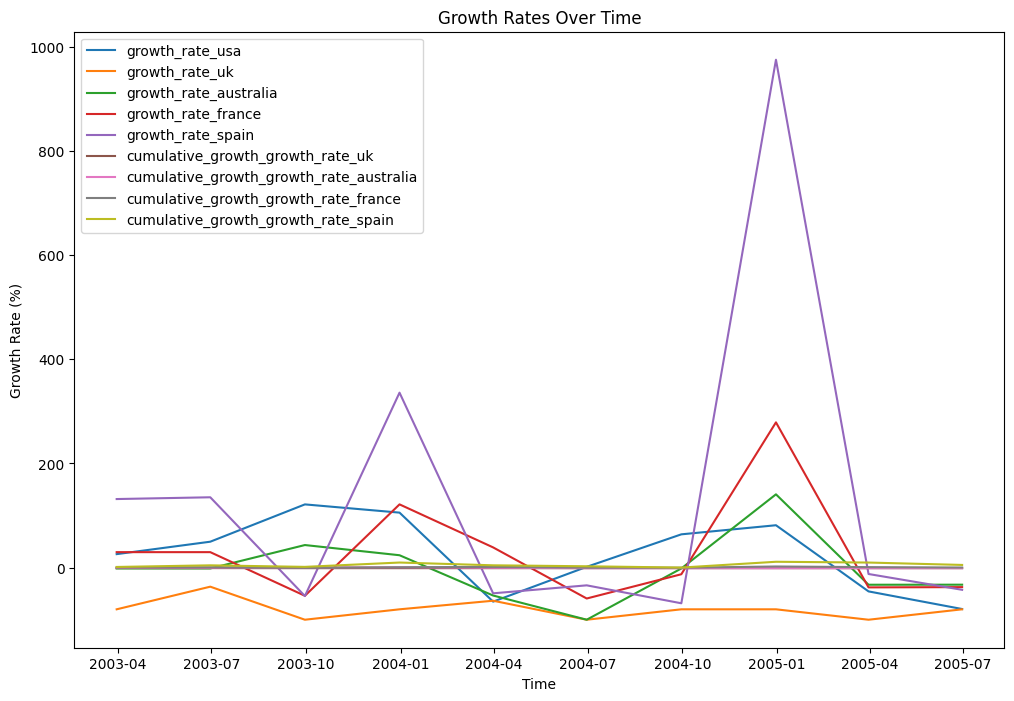

In [80]:
plt.figure(figsize=(12, 8))

# Iterate over columns and plot each line
for column in df.columns[1:]:
    plt.plot(df['orderdate'], df[column], label=column)

# Set plot title and labels
plt.title('Growth Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')

# Display a legend
plt.legend()

# graph_save("growth_rate_over_time")
# Show the plot
plt.show()

In [78]:
df.set_index('orderdate', inplace=True)

# Calculate cumulative growth for each country
for column in df.columns[1:]:
    df[f'cumulative_growth_{column}'] = (1 + df[column] / 100).cumprod() - 1

# Reset the index if needed
df.reset_index(inplace=True)

# Display the DataFrame with cumulative growth columns
df


orderdate  growth_rate_usa  growth_rate_uk  growth_rate_australia  \
0 2003-03-31        25.942997      -80.014282              -1.584227   
1 2003-06-30        49.810649      -36.539377              -1.584227   
2 2003-09-30       121.443620     -100.000000              43.390880   
3 2003-12-31       105.643687      -80.014282              23.820195   
4 2004-03-31       -65.258049      -63.532031             -53.509511   
5 2004-06-30         1.538219     -100.000000            -100.000000   
6 2004-09-30        63.956234      -80.014282              -1.584227   
7 2004-12-31        81.425276      -80.014282             140.765301   
8 2005-03-31       -45.618773     -100.000000             -32.824003   
9 2005-06-30       -79.453893      -80.014282             -32.732451   

   growth_rate_france  growth_rate_spain  cumulative_growth_growth_rate_uk  \
0           29.754489         131.709191                         -0.800143   
1           29.754489         135.104487                         -0.873169   
2          -54.035027         -54.505171                         -1.000000   
3          121.479801         335.983416                         -1.000000   
4           38.862836         -49.303819                         -1.000000   
5          -59.266120         -33.979993                         -1.000000   
6          -12.663287         -68.431119                         -1.000000   
7          278.951737         975.269748                         -1.000000   
8          -37.888715         -12.206045                         -1.000000   
9          -37.405310         -42.548784                         -1.000000   

   cumulative_growth_growth_rate_australia  \
0                                -0.015842   
1                                -0.031434   
2                                 0.388836   
3                                 0.719659   
4                                -0.200522   
5                                -1.000000   
6                                -1.000000   
7                                -1.000000   
8                                -1.000000   
9                                -1.000000   

   cumulative_growth_growth_rate_france  cumulative_growth_growth_rate_spain  
0                              0.297545                             1.317092  
1                              0.683623                             4.447587  
2                             -0.226123                             1.478370  
3                              0.713981                             9.805284  
4                              1.380082                             4.477866  
5                             -0.030500                             2.616488  
6                             -0.153271                             0.141685  
7                              2.208695                            11.276190  
8                              0.992962                             9.777753  
9                              0.247488                             5.191950

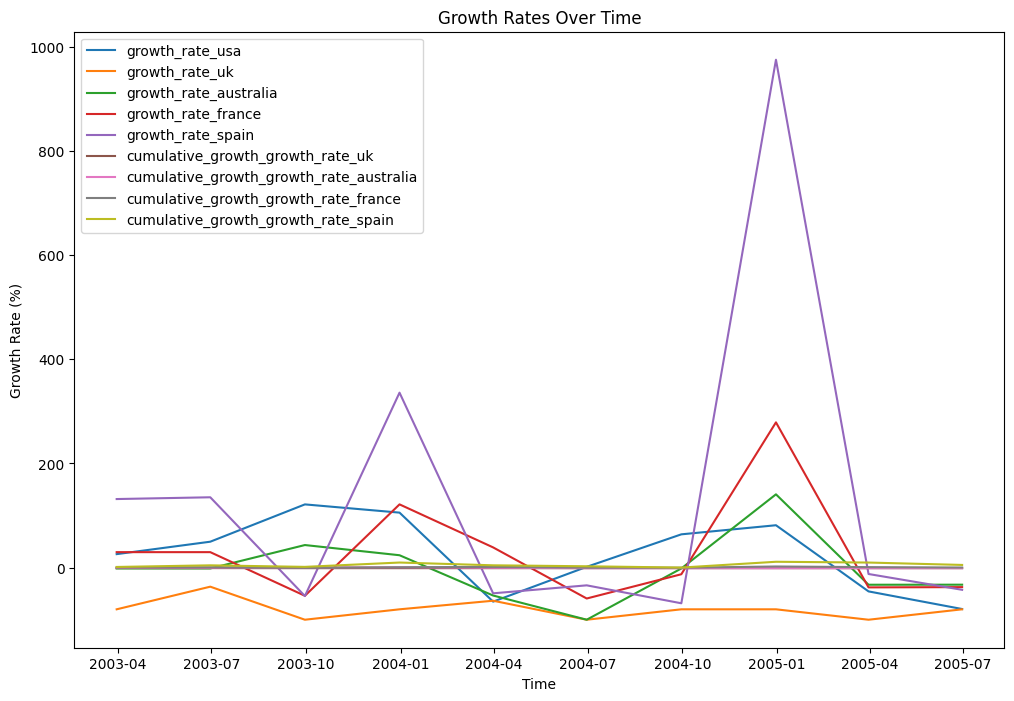

In [79]:
plt.figure(figsize=(12, 8))

# Iterate over columns and plot each line
for column in df.columns[1:]:
    plt.plot(df['orderdate'], df[column], label=column)

# Set plot title and labels
plt.title('Growth Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')

# Display a legend
plt.legend()

# Show the plot
plt.show()

In [48]:



# Pivot the DataFrame
df_pivoted = quarterly_sales_per_country.pivot_table(index='orderdate', columns='country', values='sales', aggfunc='sum')

# Reset the index to make 'orderdate' a column again
df_pivoted.reset_index(inplace=True)
for country in df_pivoted.columns[1:]:
    df_pivoted[f'{country}_csum'] = df_pivoted[country].cumsum()

df_pivoted.drop(quarterly_sales_per_country["country"].unique(),axis=1,inplace=True)
df_pivoted = df_pivoted.ffill()
df_pivoted = df_pivoted.bfill()

# Display the pivoted DataFrame
df_pivoted

country  orderdate  Australia_csum  Austria_csum  Belgium_csum  Canada_csum  \
0       2003-03-31        60135.84      38629.14       1711.26     54609.50   
1       2003-06-30        60135.84      38629.14       1711.26     54609.50   
2       2003-09-30       146365.15      38629.14       3348.46     54609.50   
3       2003-12-31       253134.45      82117.88       3348.46     54609.50   
4       2004-03-31       302772.02      82117.88      22148.55     54609.50   
5       2004-06-30       302772.02      82117.88      22148.55    110476.53   
6       2004-09-30       356403.98      88811.16      69909.03    153808.88   
7       2004-12-31       485531.13     133812.27      83372.51    190385.59   
8       2005-03-31       572273.58     142587.43     100000.67    190385.59   
9       2005-06-30       630623.10     202062.53     108412.62    224078.56   

country  Denmark_csum  Finland_csum  France_csum  Germany_csum  Ireland_csum  \
0            58871.11      69071.01    126231.51      11432.34      38784.47   
1            58871.11      69071.01    126231.51      11432.34      38784.47   
2            58871.11      69071.01    184253.79      11432.34      38784.47   
3            99192.72     111154.51    312761.42      70053.31      38784.47   
4            99192.72     111154.51    491210.76     107319.80      38784.47   
5           135271.73     159986.14    563900.10     107319.80      38784.47   
6           135271.73     202730.20    627384.58     142313.72      57756.43   
7           219624.28     202730.20    867960.12     220472.09      57756.43   
8           219624.28     329581.91   1017384.68     220472.09      57756.43   
9           245637.15     329581.91   1110916.52     220472.09      57756.43   

country  Italy_csum  Japan_csum  Norway_csum  Philippines_csum  \
0          56181.32    50490.64     54702.00          55245.02   
1          56181.32    50490.64     54702.00          55245.02   
2          56181.32    50490.64     54702.00          55245.02   
3         140928.77    50490.64    196532.60          78086.98   
4         140928.77    50490.64    196532.60          78086.98   
5         140928.77    93533.82    196532.60          78086.98   
6         291467.68    93533.82    247041.17          78086.98   
7         333164.37   149422.47    307463.70          94015.73   
8         333164.37   187613.86    307463.70          94015.73   
9         374674.31   188167.81    307463.70          94015.73   

country  Singapore_csum  Spain_csum  Sweden_csum  Switzerland_csum    UK_csum  \
0              43657.47    44621.96      9749.00          50432.55   51017.92   
1              43657.47   149530.19      9749.00          50432.55   83394.21   
2              87876.83   197258.01      9749.00          50432.55   83394.21   
3             165686.20   405343.39      9749.00          50432.55  180421.55   
4             189905.79   510834.73      9749.00          50432.55  215805.45   
5             235694.51   580480.12      9749.00          50432.55  215805.45   
6             281725.23   602466.39     63690.69         117713.56  215805.45   
7             281725.23   838878.10    103436.36         117713.56  387669.40   
8             285900.83  1046433.29    135043.08         117713.56  387669.40   
9             288488.41  1165676.27    135043.08         117713.56  428472.21   

country    USA_csum  
0         103274.02  
1         257989.50  
2         600597.06  
3        1305147.88  
4        1549922.58  
5        1798462.45  
6        2205959.06  
7        2945260.91  
8        3347302.33  
9        3429906.19

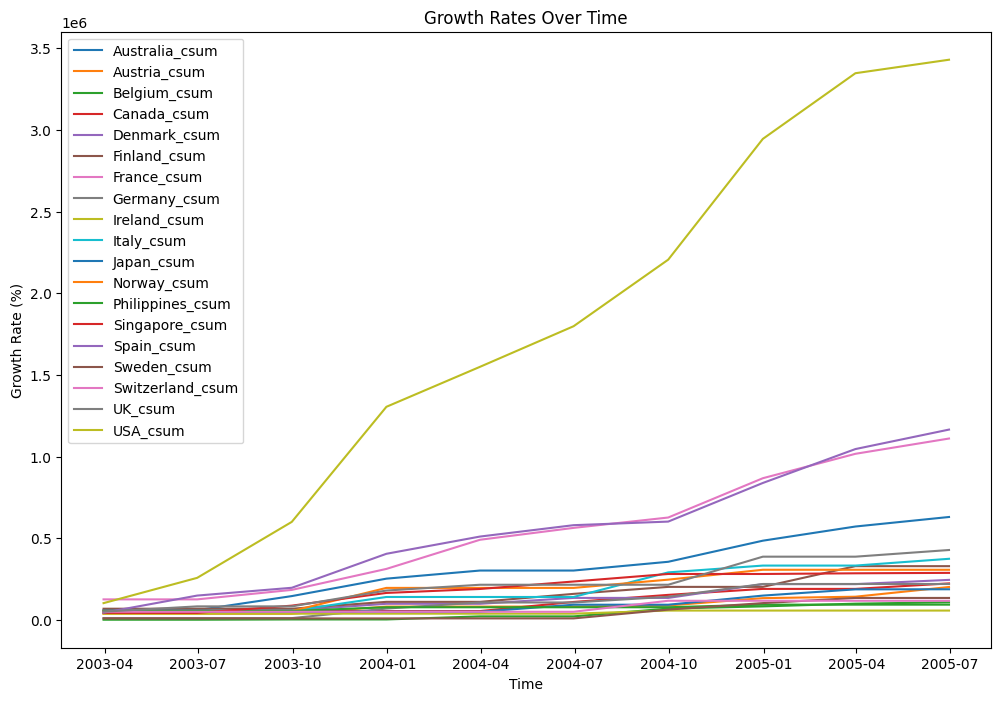

In [81]:
## cumilative growth
plt.figure(figsize=(12, 8))

# Iterate over columns and plot each line
for column in df_pivoted.columns[1:]:
    plt.plot(df_pivoted['orderdate'], df_pivoted[column], label=column)

# Set plot title and labels
plt.title('Growth Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')

# Display a legend
plt.legend()
graph_save("growth-rate-overtime")
# Show the plot
plt.show()

In [50]:
df_cumulative_growth = pd.DataFrame()

# Copy 'orderdate' column to the new DataFrame
df_cumulative_growth['orderdate'] = df_pivoted['orderdate']

# Calculate cumulative growth rate for each country and add to the new DataFrame
for country in df_pivoted.columns[2:]:
    column_name = f'{country}'
    df_cumulative_growth[column_name] = df_pivoted[column_name].pct_change() * 100


# Display the new DataFrame with cumulative growth rates
df_cumulative_growth

orderdate  Austria_csum  Belgium_csum  Canada_csum  Denmark_csum  \
0 2003-03-31           NaN           NaN          NaN           NaN   
1 2003-06-30      0.000000      0.000000     0.000000      0.000000   
2 2003-09-30      0.000000     95.672195     0.000000      0.000000   
3 2003-12-31    112.580140      0.000000     0.000000     68.491336   
4 2004-03-31      0.000000    561.454818     0.000000      0.000000   
5 2004-06-30      0.000000      0.000000   102.302768     36.372639   
6 2004-09-30      8.150819    215.637051    39.223127      0.000000   
7 2004-12-31     50.670558     19.258571    23.780623     62.357856   
8 2005-03-31      6.557814     19.944416     0.000000      0.000000   
9 2005-06-30     41.711321      8.411894    17.697227     11.844260   

   Finland_csum  France_csum  Germany_csum  Ireland_csum  Italy_csum  \
0           NaN          NaN           NaN           NaN         NaN   
1      0.000000     0.000000      0.000000      0.000000    0.000000   
2      0.000000    45.964973      0.000000      0.000000    0.000000   
3     60.927877    69.744905    512.764403      0.000000  150.846313   
4      0.000000    57.056059     53.197329      0.000000    0.000000   
5     43.931308    14.797994      0.000000      0.000000    0.000000   
6     26.717352    11.258108     32.607142     48.916383  106.819147   
7      0.000000    38.345785     54.919772      0.000000   14.305768   
8     62.571689    17.215602      0.000000      0.000000    0.000000   
9      0.000000     9.193360      0.000000      0.000000   12.459297   

   Japan_csum  Norway_csum  Philippines_csum  Singapore_csum  Spain_csum  \
0         NaN          NaN               NaN             NaN         NaN   
1    0.000000     0.000000          0.000000        0.000000  235.104487   
2    0.000000     0.000000          0.000000      101.287042   31.918518   
3    0.000000   259.278637         41.346641       88.543670  105.488938   
4    0.000000     0.000000          0.000000       14.617747   26.025178   
5   85.249821     0.000000          0.000000       24.111282   13.633644   
6    0.000000    25.699843          0.000000       19.529823    3.787601   
7   59.752344    24.458486         20.398727        0.000000   39.240647   
8   25.559335     0.000000          0.000000        1.482153   24.741996   
9    0.295261     0.000000          0.000000        0.905062   11.395182   

   Sweden_csum  Switzerland_csum     UK_csum    USA_csum  
0          NaN               NaN         NaN         NaN  
1     0.000000          0.000000   63.460623  149.810649  
2     0.000000          0.000000    0.000000  132.799033  
3     0.000000          0.000000  116.347814  117.308403  
4     0.000000          0.000000   19.611792   18.754557  
5     0.000000          0.000000    0.000000   16.035631  
6   553.304852        133.407908    0.000000   22.658055  
7    62.404207          0.000000   79.638373   33.513852  
8    30.556682          0.000000    0.000000   13.650452  
9     0.000000          0.000000   10.525156    2.467774

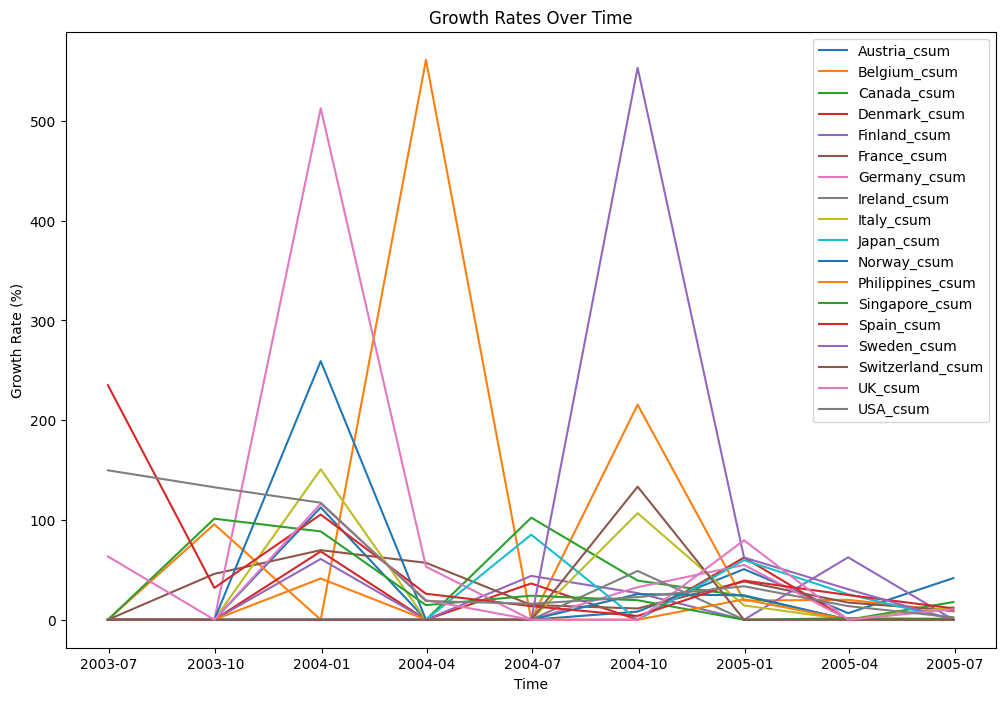

In [82]:
## cumilative growth
plt.figure(figsize=(12, 8))

# Iterate over columns and plot each line
for column in df_cumulative_growth.columns[1:]:
    plt.plot(df_cumulative_growth['orderdate'], df_cumulative_growth[column], label=column)

# Set plot title and labels
plt.title('Growth Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')

# Display a legend
plt.legend()
graph_save("tsa_gwtrate")
# Show the plot
plt.show()

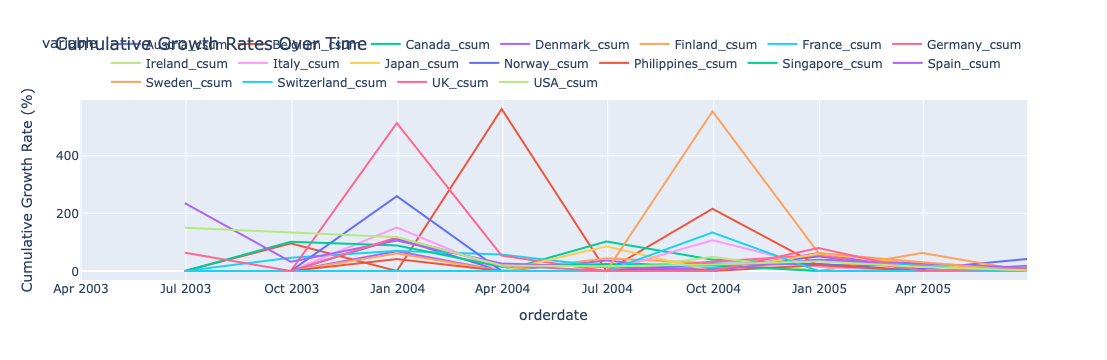

In [52]:
fig = px.line(df_cumulative_growth, x='orderdate', y=df_cumulative_growth.columns[1:],
              labels={'value': 'Cumulative Growth Rate (%)'},
              title='Cumulative Growth Rates Over Time',
              )

# Display the legend
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Show the interactive plot
fig.show()

## markets that show promises are 
* belgium:- it registered the fatest growth
*  usa - it offers a consistent growth pattern 

In [53]:
df = quarterly_sales_per_country.pivot_table(index='orderdate', columns='country', values='sales', aggfunc='sum')

# Reset the index to make 'orderdate' a column again
df.reset_index(inplace=True)
# for country in df.columns[1:]:
#     df[f'{country}_gwthrt'] = df[country].pct_change() * 100

# # df.drop(quarterly_sales_per_country["country"].unique(),axis=1,inplace=True)
# df = df.ffill()
# df = df.bfill()

# Display the pivoted DataFrame
df

country  orderdate  Australia   Austria   Belgium    Canada   Denmark  \
0       2003-03-31        NaN       NaN       NaN       NaN  58871.11   
1       2003-06-30   60135.84  38629.14   1711.26       NaN      0.00   
2       2003-09-30   86229.31      0.00   1637.20       NaN      0.00   
3       2003-12-31  106769.30  43488.74      0.00  54609.50  40321.61   
4       2004-03-31   49637.57      0.00  18800.09      0.00      0.00   
5       2004-06-30       0.00      0.00      0.00  55867.03  36079.01   
6       2004-09-30   53631.96   6693.28  47760.48  43332.35      0.00   
7       2004-12-31  129127.15  45001.11  13463.48  36576.71  84352.55   
8       2005-03-31   86742.45   8775.16  16628.16      0.00      0.00   
9       2005-06-30   58349.52  59475.10   8411.95  33692.97  26012.87   

country    Finland     France   Germany   Ireland      Italy     Japan  \
0              NaN        NaN  11432.34       NaN   56181.32       NaN   
1              NaN  126231.51      0.00       NaN       0.00       NaN   
2         69071.01   58022.28      0.00       NaN       0.00       NaN   
3         42083.50  128507.63  58620.97       NaN   84747.45       NaN   
4             0.00  178449.34  37266.49  38784.47       0.00  50490.64   
5         48831.63   72689.34      0.00      0.00       0.00  43043.18   
6         42744.06   63484.48  34993.92  18971.96  150538.91      0.00   
7             0.00  240575.54  78158.37       NaN   41696.69  55888.65   
8        126851.71  149424.56       NaN       NaN       0.00  38191.39   
9              NaN   93531.84       NaN       NaN   41509.94    553.95   

country     Norway  Philippines  Singapore      Spain    Sweden  Switzerland  \
0         54702.00     55245.02        NaN   44621.96   9749.00          NaN   
1             0.00         0.00   43657.47  104908.23      0.00          NaN   
2             0.00         0.00   44219.36   47727.82      0.00          NaN   
3        141830.60     22841.96   77809.37  208085.38      0.00          NaN   
4             0.00         0.00   24219.59  105491.34      0.00     50432.55   
5             0.00         0.00   45788.72   69645.39      0.00         0.00   
6         50508.57         0.00   46030.72   21986.27  53941.69     67281.01   
7         60422.53     15928.75       0.00  236411.71  39745.67          NaN   
8              NaN          NaN    4175.60  207555.19  31606.72          NaN   
9              NaN          NaN    2587.58  119242.98       NaN          NaN   

country         UK        USA  
0         51017.92  103274.02  
1         32376.29  154715.48  
2             0.00  342607.56  
3         97027.34  704550.82  
4         35383.90  244774.70  
5             0.00  248539.87  
6             0.00  407496.61  
7        171863.95  739301.85  
8             0.00  402041.42  
9         40802.81   82603.86

In [54]:
df_percentage_change = df.copy()

# Calculate percentage change for each column (excluding the 'orderdate' column)
df_percentage_change.iloc[:, 1:] = df_pivoted.iloc[:, 1:].pct_change() * 100

# Display the new DataFrame with percentage changes
df_percentage_change

country  orderdate   Australia     Austria     Belgium      Canada    Denmark  \
0       2003-03-31         NaN         NaN         NaN         NaN        NaN   
1       2003-06-30    0.000000    0.000000    0.000000    0.000000   0.000000   
2       2003-09-30  143.390880    0.000000   95.672195    0.000000   0.000000   
3       2003-12-31   72.947215  112.580140    0.000000    0.000000  68.491336   
4       2004-03-31   19.609172    0.000000  561.454818    0.000000   0.000000   
5       2004-06-30    0.000000    0.000000    0.000000  102.302768  36.372639   
6       2004-09-30   17.713645    8.150819  215.637051   39.223127   0.000000   
7       2004-12-31   36.230558   50.670558   19.258571   23.780623  62.357856   
8       2005-03-31   17.865477    6.557814   19.944416    0.000000   0.000000   
9       2005-06-30   10.196088   41.711321    8.411894   17.697227  11.844260   

country    Finland     France     Germany    Ireland       Italy      Japan  \
0              NaN        NaN         NaN        NaN         NaN        NaN   
1         0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
2         0.000000  45.964973    0.000000   0.000000    0.000000   0.000000   
3        60.927877  69.744905  512.764403   0.000000  150.846313   0.000000   
4         0.000000  57.056059   53.197329   0.000000    0.000000   0.000000   
5        43.931308  14.797994    0.000000   0.000000    0.000000  85.249821   
6        26.717352  11.258108   32.607142  48.916383  106.819147   0.000000   
7         0.000000  38.345785   54.919772   0.000000   14.305768  59.752344   
8        62.571689  17.215602    0.000000   0.000000    0.000000  25.559335   
9         0.000000   9.193360    0.000000   0.000000   12.459297   0.295261   

country      Norway  Philippines   Singapore       Spain      Sweden  \
0               NaN          NaN         NaN         NaN         NaN   
1          0.000000     0.000000    0.000000  235.104487    0.000000   
2          0.000000     0.000000  101.287042   31.918518    0.000000   
3        259.278637    41.346641   88.543670  105.488938    0.000000   
4          0.000000     0.000000   14.617747   26.025178    0.000000   
5          0.000000     0.000000   24.111282   13.633644    0.000000   
6         25.699843     0.000000   19.529823    3.787601  553.304852   
7         24.458486    20.398727    0.000000   39.240647   62.404207   
8          0.000000     0.000000    1.482153   24.741996   30.556682   
9          0.000000     0.000000    0.905062   11.395182    0.000000   

country  Switzerland          UK         USA  
0                NaN         NaN         NaN  
1           0.000000   63.460623  149.810649  
2           0.000000    0.000000  132.799033  
3           0.000000  116.347814  117.308403  
4           0.000000   19.611792   18.754557  
5           0.000000    0.000000   16.035631  
6         133.407908    0.000000   22.658055  
7           0.000000   79.638373   33.513852  
8           0.000000    0.000000   13.650452  
9           0.000000   10.525156    2.467774

In [55]:
fig = px.line(df_percentage_change, x='orderdate', y= df_percentage_change.columns[1:],
              labels={'value': 'Cumulative Growth Rate (%)'},
              title='Cumulative Growth Rates Over Time',
              )

# Display the legend
# fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Show the interactive plot

## during jan -2004  germany and norway  showcased the most promising  steps
## between jan-04 to jul -2004 belgium showcased good potential
## sweeden also picked up momentum during the jul 04 to jan O5 cycle ,


*one thing to note is that , the market share may be less , so even a small change would refelect huge rise in percent value, 
so it will be much safer to assume that these markets shows great potential for expansion than actually going behind the magnitude of the change

In [57]:
print("hello")

hello


In [58]:
pwd

'/Users/shankuriakose/Desktop/DataAnalysis/Analysis_DA'

In [ ]:
# cd ~/Downloads/